<a href="https://colab.research.google.com/github/Rushikesh419/Machine-learning/blob/main/PCA_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/cancer_tumor_data_features.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_X= scaler.fit_transform(df)

In [ ]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca_model=PCA(n_components=2)

In [ ]:
pc_result=pca_model.fit_transform(scaled_X)

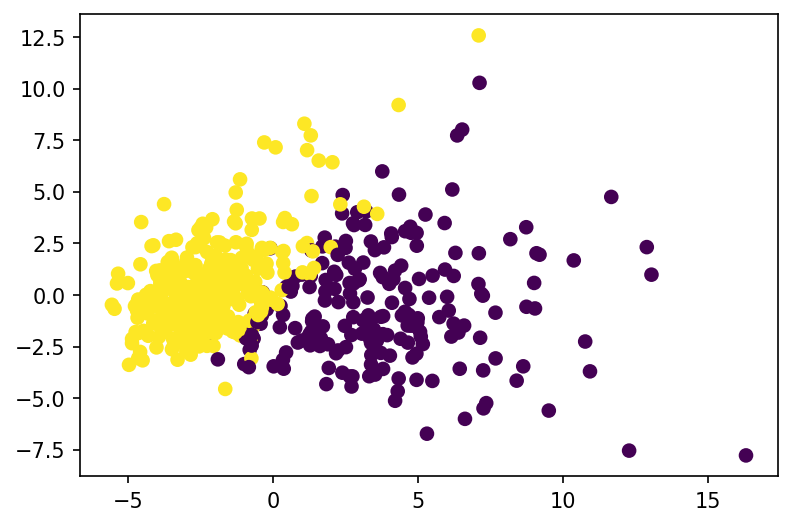

In [ ]:
plt.figure(figsize=(6,4),dpi=150)
plt.scatter(pc_result[:,0],pc_result[:,1],c=cancer_dict['target'])

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer_dict=load_breast_cancer()

In [ ]:
cancer_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [ ]:
df_comp=pd.DataFrame(pca_model.components_,index=['PC1','PC2'],columns=df.columns)

In [ ]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

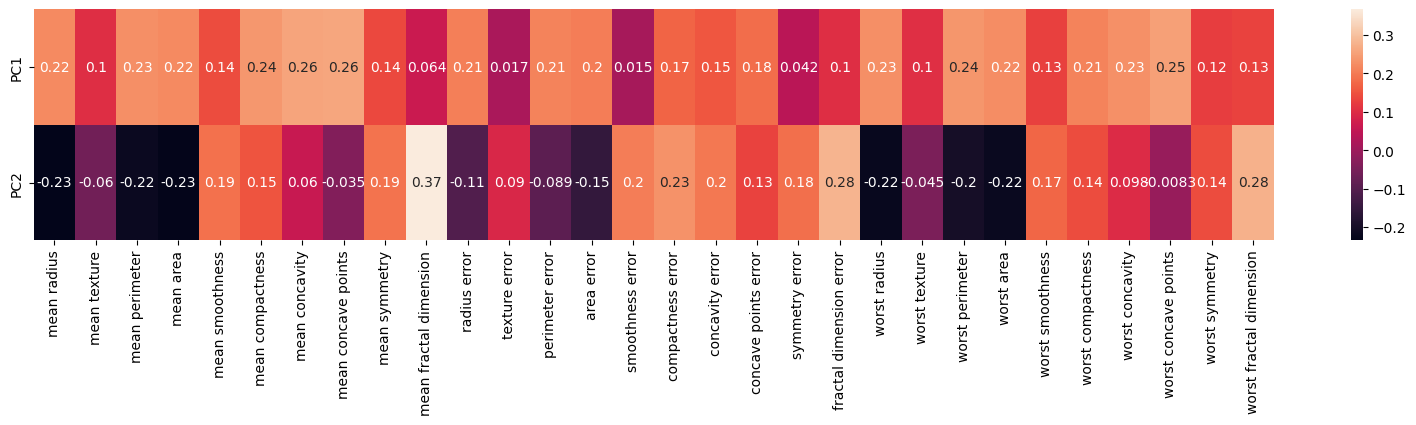

In [ ]:
plt.figure(figsize=(20,3),dpi=100)
sns.heatmap(df_comp,annot=True)

In [ ]:
pca_model.explained_variance_

array([13.30499079,  5.7013746 ])

In [ ]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [ ]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155942

In [ ]:
# means we get 63 percent of the data from 2 components

In [ ]:
explained_var=[]
for n in range(1,30):
  pca=PCA(n_components=n)

  pca.fit(scaled_X)
  explained_var.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'varience explained')

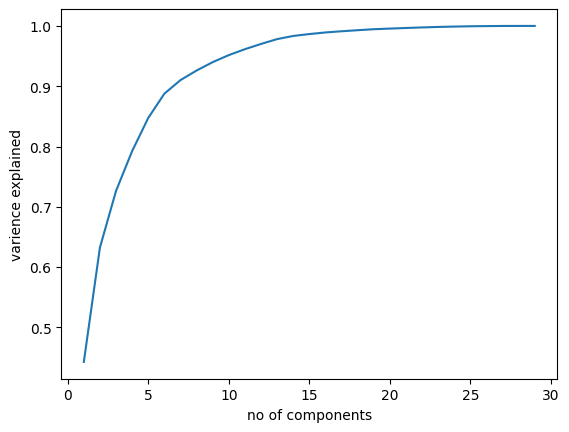

In [ ]:
plt.plot(range(1,30),explained_var)
plt.xlabel('no of components')
plt.ylabel('varience explained
  ')